In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Creating dataframe of the data

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
# renaming columns for ease of calling

df.columns=[i.split()[0] if(len(i.split())>2) else i.replace(" ","_") for i in df.columns]
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [7]:
df.dtypes

Country               object
Region                object
Happiness_Rank         int64
Happiness_Score      float64
Standard_Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia_Residual    float64
dtype: object

In [8]:
df.isnull().sum()

Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [9]:
df.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
df.skew()

Happiness_Rank       0.000418
Happiness_Score      0.097769
Standard_Error       1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia_Residual   -0.238911
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

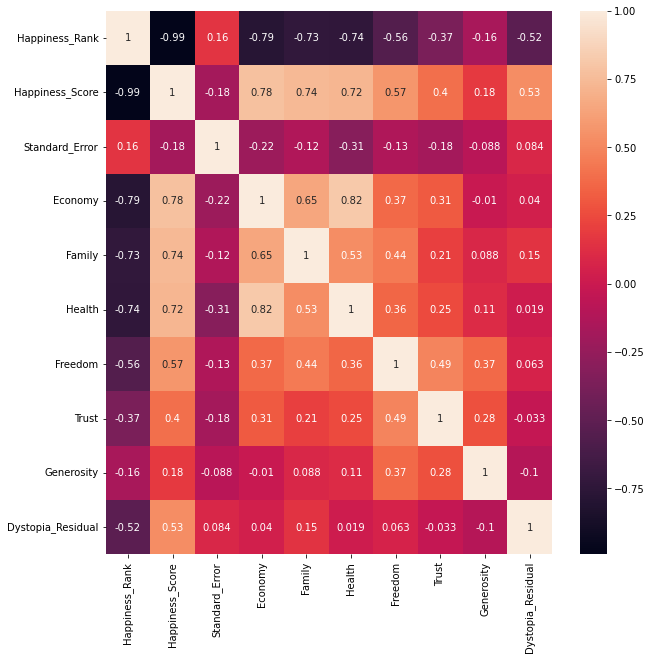

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [5]:
# dropping happiness rank because it is very negatively correlated to happiness score and it has high standard deviation
# it is also redundant because the countries are in order of rank already

df.drop(['Happiness_Rank'], axis=1, inplace=True)

In [22]:
df.head()

,Country,Region,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Univariate Analysis

Happiness_Score         AxesSubplot(0.125,0.536818;0.133621x0.343182)
Standard_Error       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Economy               AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Family               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Health               AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Freedom                    AxesSubplot(0.125,0.125;0.133621x0.343182)
Trust                   AxesSubplot(0.285345,0.125;0.133621x0.343182)
Generosity               AxesSubplot(0.44569,0.125;0.133621x0.343182)
Dystopia_Residual       AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

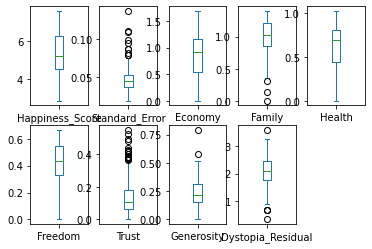

In [23]:
df.plot(kind='box', subplots=True, layout=(2, 5))

<AxesSubplot:>

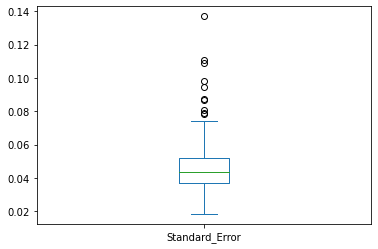

In [15]:
df['Standard_Error'].plot.box()

<AxesSubplot:>

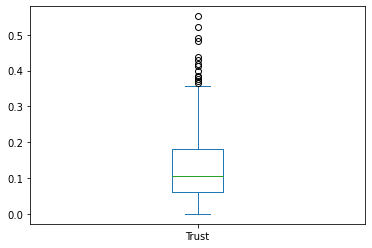

In [16]:
df['Trust'].plot.box()

<AxesSubplot:ylabel='Frequency'>

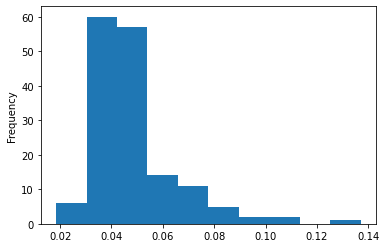

In [17]:
df['Standard_Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

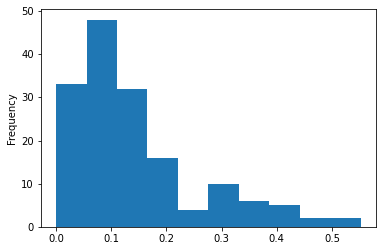

In [18]:
df['Trust'].plot.hist()

<Figure size 432x288 with 0 Axes>

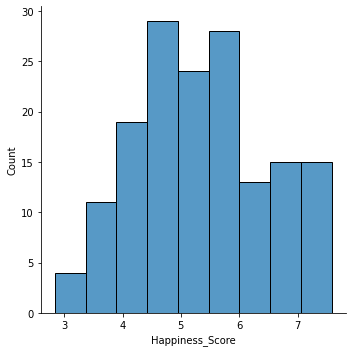

<Figure size 432x288 with 0 Axes>

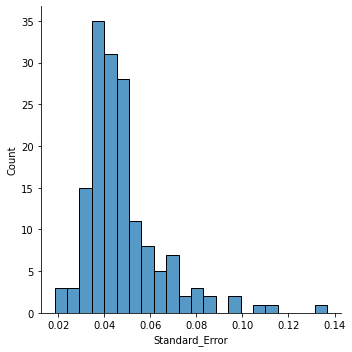

<Figure size 432x288 with 0 Axes>

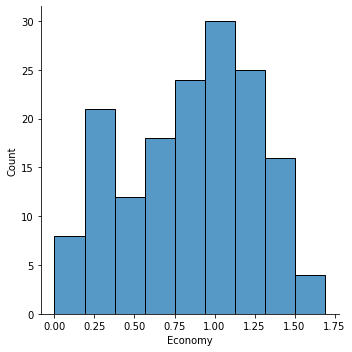

<Figure size 432x288 with 0 Axes>

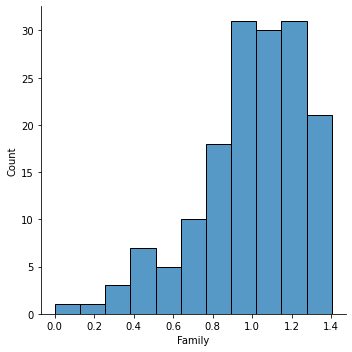

<Figure size 432x288 with 0 Axes>

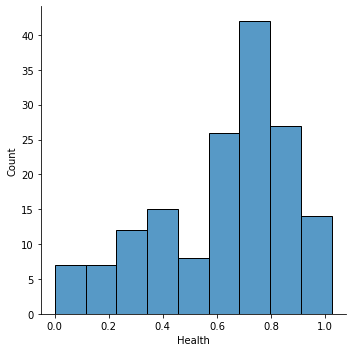

<Figure size 432x288 with 0 Axes>

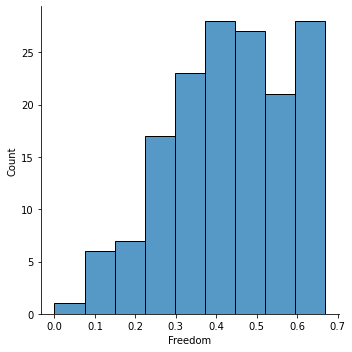

<Figure size 432x288 with 0 Axes>

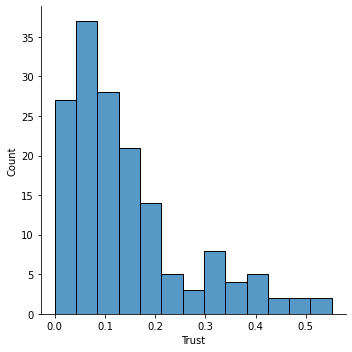

<Figure size 432x288 with 0 Axes>

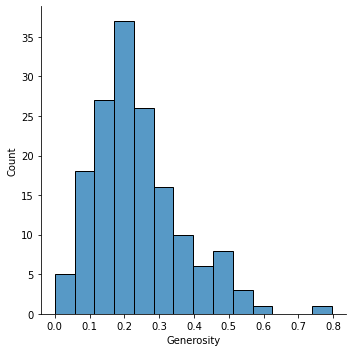

<Figure size 432x288 with 0 Axes>

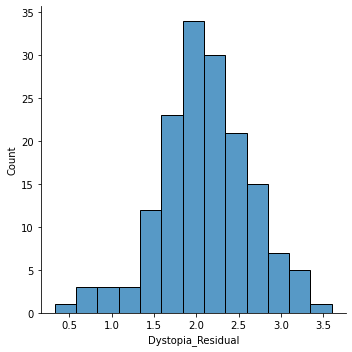

In [19]:
for i in df.columns[2:]:
    plt.figure()
    sns.displot(df[i])

Conclusion: Very few outliers but some skewness is present in the data set.

### Bivariate Analysis

<AxesSubplot:xlabel='Region', ylabel='count'>

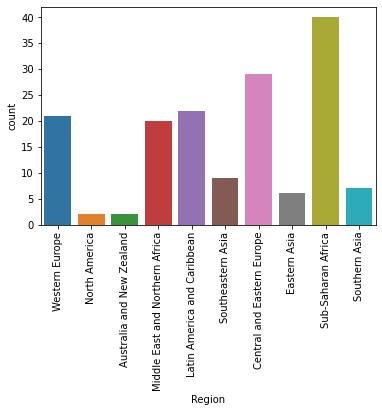

In [20]:
# count plot to see number of countries in each region

# rotating region names for better visualisation
plt.xticks(rotation= 90)
sns.countplot(df.Region)

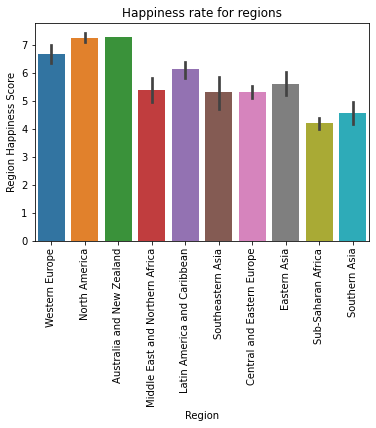

In [21]:
# Barplot to visualize happiness score in regions

sns.barplot(x=df.Region, y=df.Happiness_Score)
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Score')
plt.title('Happiness rate for regions')
plt.show()

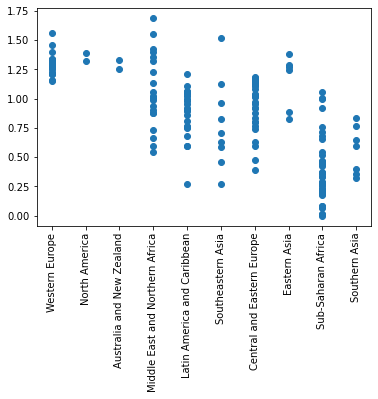

In [23]:
# Scatterplot visualising economy in regions

plt.scatter(df.Region, df.Economy)
plt.xticks(rotation= 90)
plt.show()

<AxesSubplot:xlabel='Economy', ylabel='Health'>

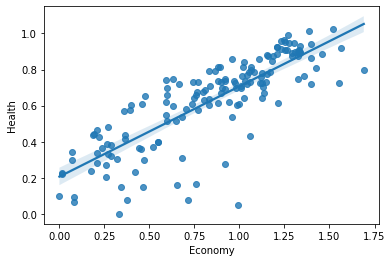

In [24]:
sns.regplot(df.Economy,df.Health,df)

<AxesSubplot:xlabel='Freedom', ylabel='Trust'>

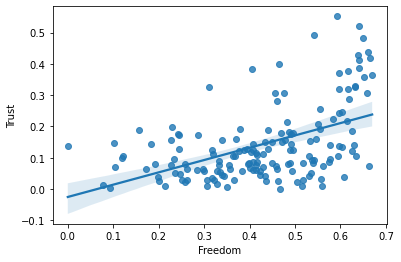

In [25]:
sns.regplot(df.Freedom,df.Trust,df)

### Encoding the categorical inputs

In [26]:
df.dtypes

Country               object
Region                object
Happiness_Score      float64
Standard_Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia_Residual    float64
dtype: object

In [6]:
le = LabelEncoder()

list1 = ['Country', 'Region']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))
    
df

,Country,Region,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Removing outliers

Country                 AxesSubplot(0.125,0.536818;0.110714x0.343182)
Region               AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness_Score      AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Standard_Error       AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Economy              AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Family               AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Health                     AxesSubplot(0.125,0.125;0.110714x0.343182)
Freedom                 AxesSubplot(0.257857,0.125;0.110714x0.343182)
Trust                   AxesSubplot(0.390714,0.125;0.110714x0.343182)
Generosity              AxesSubplot(0.523571,0.125;0.110714x0.343182)
Dystopia_Residual       AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

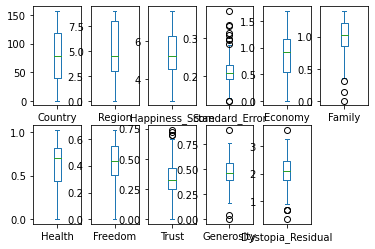

In [31]:
df.plot(kind='box', subplots=True, layout=(2, 6))

In [7]:
from scipy.stats import zscore

z = np.abs(zscore(df))

print(np.where(z > 3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [8]:
df.shape

(158, 11)

In [9]:
len(np.where(z > 3)[0])

9

In [10]:
df = df[(z<3).all(axis=1)]

In [11]:
df.shape

(149, 11)

### Training and testing model

In [12]:
x = df.drop('Happiness_Score',axis=1)
y = df['Happiness_Score']

In [13]:
x

,Country,Region,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,66,8,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [14]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness_Score, Length: 149, dtype: float64

In [16]:
lr = LinearRegression()

In [18]:
from sklearn.metrics import r2_score

In [19]:
best_train_score  = 0
best_test_score  = 0
best_random_state_test = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3, random_state=i)
    lr.fit(xtrain,ytrain)
    pred_train = lr.predict(xtrain)
    pred_test = lr.predict(xtest)
    print(f"At random state {i}, the training accuracy is: {r2_score(ytrain, pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(ytest, pred_test)}")
    print('\n')
    if r2_score(ytrain, pred_train) > best_train_score:
        best_train_score = r2_score(ytrain, pred_train)
    if r2_score(ytest, pred_test) > best_test_score:
        best_test_score = r2_score(ytest, pred_test)
        best_random_state_test = i
        
print(best_train_score)
print(best_test_score)
print(best_random_state_test)

At random state 0, the training accuracy is: 0.99999994284572
At random state 0, the testing accuracy is: 0.9999999298977803


At random state 1, the training accuracy is: 0.9999999484330332
At random state 1, the testing accuracy is: 0.9999999111807791


At random state 2, the training accuracy is: 0.9999999419321156
At random state 2, the testing accuracy is: 0.9999999330433341


At random state 3, the training accuracy is: 0.9999999405249979
At random state 3, the testing accuracy is: 0.9999999292422005


At random state 4, the training accuracy is: 0.9999999260269514
At random state 4, the testing accuracy is: 0.999999947861831


At random state 5, the training accuracy is: 0.9999999380819068
At random state 5, the testing accuracy is: 0.9999999382762627


At random state 6, the training accuracy is: 0.9999999467814856
At random state 6, the testing accuracy is: 0.9999999126954324


At random state 7, the training accuracy is: 0.9999999525328123
At random state 7, the testing accur

At random state 77, the training accuracy is: 0.9999999438641136
At random state 77, the testing accuracy is: 0.999999917566814


At random state 78, the training accuracy is: 0.9999999511214118
At random state 78, the testing accuracy is: 0.9999998930313535


At random state 79, the training accuracy is: 0.9999999451105746
At random state 79, the testing accuracy is: 0.9999999174215555


At random state 80, the training accuracy is: 0.9999999426132562
At random state 80, the testing accuracy is: 0.9999999248804136


At random state 81, the training accuracy is: 0.9999999503523541
At random state 81, the testing accuracy is: 0.9999998932284309


At random state 82, the training accuracy is: 0.9999999390217648
At random state 82, the testing accuracy is: 0.9999999395529671


At random state 83, the training accuracy is: 0.9999999496212985
At random state 83, the testing accuracy is: 0.9999999049931885


At random state 84, the training accuracy is: 0.9999999354068725
At random state 84,

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30, random_state=8)

In [21]:
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print('The mean squared error is: ',mean_squared_error(ytest,pred))

The mean squared error is:  6.949392281504162e-08


In [22]:
lr.coef_

array([-8.64064461e-07, -1.38083624e-05, -1.63827075e-04,  1.00011143e+00,
        1.00001341e+00,  9.99697730e-01,  9.99556862e-01,  1.00014298e+00,
        1.00023135e+00,  1.00005626e+00])

In [23]:
lr.score(xtrain,ytrain)

0.9999999318958256

#### Conclusion: The mean squared error is only 0.0000000694%, and the score is 99.99999% which means that the model is working well.

## Exporting model

In [27]:
import pickle
filename = 'happiness.pkl'
pickle.dump(lr, open(filename, 'wb'))

loading it back

In [32]:
model = pickle.load(open('happiness.pkl', 'rb'))
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
r2_score(ytest, pred)

0.9999999522048741